# Проект "Предсказание температуры стали"

**Цель проекта:** <br>

Построение модели, предсказывающей температуру стали.

**Описание задачи:**<br>

Чтобы оптимизировать производственные расходы, металлургический комбинат решил уменьшить потребление электроэнергии на этапе обработки стали. Необходимо построить модель, которая предскажет температуру стали.

**Описание этапа обработки:**<br>

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша.<br>

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).<br>

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.<br>

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).<br>

**Описание данных:**

Данные состоят из файлов, полученных из разных источников:

- `data_arc_new.csv` — данные об электродах;
- `data_bulk_new.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time_new.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas_new.csv` — данные о продувке сплава газом;
- `data_temp_new.csv` — результаты измерения температуры;
- `data_wire_new.csv` — данные о проволочных материалах (объём);
- `data_wire_time_new.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

**План работы:**<br>
1. Первичный анализ данных<br>
    1.1. Изучение общей информации о данных<br>
    1.2. Графический анализ данных<br> 
    1.3. Выводы<br>
    1.4. Список вопросов бизнесу о технологическом процессе<br>
2. Предобработка данных и исследовательский анализ<br> 
    2.1. Предобработка данных<br> 
    2.2. Объединение исходных датасетов в единый датасет<br> 
    2.3. Разделение данных на обучающую и тестовую выборки<br> 
    2.4. Исследовательский анализ данных<br> 
    2.5. Выводы<br> 
3. Проверка данных на мультиколлинеарность<br> 
    3.1. Выводы<br> 
4. Обучение различных моделей и выбор лучшей<br> 
    4.1. Обучение модели 1<br> 
    4.2. Обучение модели 2<br> 
    4.3. Обучение модели 3<br>
    4.4. Обучение модели 4<br>
    4.4. Выводы<br> 
5. Тестирование лучшей модели<br>
6. Оценка важности факторов
7. Отчет о проделанной работе<br> 

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
import statsmodels.api as sm
from catboost import CatBoostRegressor
from scipy import stats
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
import numpy as np
from lightgbm import LGBMRegressor
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import RandomizedSearchCV
import time
from IPython.display import display

## Первичный анализ данных

### Изучение общей информации о данных. 

Откроем имеющиеся файлы и изучим общую информацию. 

In [2]:
# данные об электродах
electrode_df = pd.read_csv('/datasets/data_arc_new.csv')
# данные о подаче сыпучих материалов (объём)
bulk_volume_df = pd.read_csv('/datasets/data_bulk_new.csv')
# данные о подаче сыпучих материалов (время)
bulk_time_df = pd.read_csv('/datasets/data_bulk_time_new.csv')
# данные о продувке сплава газом
gas_df = pd.read_csv('/datasets/data_gas_new.csv')
# результаты измерения температуры
temperature_df = pd.read_csv('/datasets/data_temp_new.csv')
# данные о проволочных материалах (объём)
wire_volume_df = pd.read_csv('/datasets/data_wire_new.csv')
# данные о проволочных материалах (время)
wire_time_df = pd.read_csv('/datasets/data_wire_time_new.csv')

Проведем первичный анализ данных. 

1) Первичный анализ. Данные об электродах **electrode_df**.

In [3]:
electrode_df.head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691


In [4]:
electrode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


In [5]:
electrode_df.isna().sum()

key                     0
Начало нагрева дугой    0
Конец нагрева дугой     0
Активная мощность       0
Реактивная мощность     0
dtype: int64

**electrode_df** <br>
- Данные представляют собой таблицу из 14876 строк и 5 столбцов. Пропуски отсутствуют.<br>
- Необходимая предобработка:<br>
        1) названия столбцов записать без пропусков и использовать строчные латинские символы
        2) начало и конец нагрева дугой перевести в формат datetime (возможно добавить столбец с рассчитанным временем на-грева) 
- Вопросы бизнесу:<br>
        1) Какой смысл несут данные в столбцах "Активная мощность" и "Реактивная мощность", в каких единицах измерения они выражены?

2) Первичный анализ. Данные о подаче сыпучих материалов (объём) **bulk_volume_df**.

In [6]:
bulk_volume_df.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


In [7]:
bulk_volume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [8]:
bulk_volume_df.isna().sum()

key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64

**bulk_volume_df** <br>
- Данные представляют собой таблицу из 3129 строк и 16 столбцов. Большое количество пропущенных значений.
- Необходимая предобработка:<br>
        1) названия столбцов записать без пропусков и использовать строчные символы
        2) обработка пропусков (возможно - замена пропусков на нулевые значения)
- Вопросы бизнесу:<br>
        1) Как выстроен процесс подачи сыпучих материалов, почему их именно 15? 
        2) Можно ли объяснить наличие большого количества пропусков тем, что сыпучие материалы не подавались и заменить   пропуск на нулевое значение? 
        3) Является ли правдоподобным тот факт, что для 8 подачи (Bulk 8) есть данные только для одной партии?

3) Первичный анализ. Данные о подаче сыпучих материалов (время) **bulk_time_df**.

In [9]:
bulk_time_df.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47


In [10]:
bulk_time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


In [11]:
bulk_time_df.isna().sum()

key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64

**bulk_time_df**<br>
- Даннные представляют собой таблицу из 3129 строк и 16 столбцов. Большое количество пропусков, в том же количестве, что и в bulk_volume_df. 
- Необходимая предобработка: <br>
        1) названия столбцов записать без пропусков и использовать строчные символы
        2) обработка пропусков (возможно - замена пропусков на нулевые значения)
        3) перевести данные (кроме key) в формат datetime
- Заметки: <br>
        1) Данные о подаче сыпучих материалов (время) могут быть не значимым признаком. Если это подтвердится при дальней-шем анализе, есть вероятность, что они не будут использоваться для обучения модели.  
 

4) Первичный анализ. Данные о продувке сплава газом **gas_df**. 

In [12]:
gas_df.head()

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


In [13]:
gas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


In [14]:
gas_df.isna().sum()

key      0
Газ 1    0
dtype: int64

**gas_df**<br>
- Данные представляют собой таблицу из 3239 строк и 2 столбцов. Пропуски в данных отсутствуют.<br>
- Необходимая предобработка:<br>
        1) название столбца записать без пропусков строчными латинскими символами
- Вопросы бизнесу:<br>
        1) Как устроен процесс продувки сплава газом, какие именно данные нам предоставлены? Почему здесь только одна ите-рация, продувка осуществляется только один раз для партии, или указан суммарный объем после всех итераций (после ка-ждого добавления сыпучих материалов и пр. в партию)?
        2) Для чего в принципе осуществляется продувка газом? Этот процесс может влиять на температуру стали?        

5) Первичный анализ. Результаты измерения температуры **temperature_df**.

In [15]:
temperature_df.head()

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


In [16]:
temperature_df.tail()

,key,Время замера,Температура
18087,3241,2019-09-06 16:55:01,NaN
18088,3241,2019-09-06 17:06:38,NaN
18089,3241,2019-09-06 17:21:48,NaN
18090,3241,2019-09-06 17:24:44,NaN
18091,3241,2019-09-06 17:30:05,NaN


In [17]:
temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


In [18]:
temperature_df.isna().sum()

key                0
Время замера       0
Температура     3427
dtype: int64

**temperature_df**

- Данные представляют собой таблицу из 18092 строк и 3 столбцов. Есть пропуски в столбце Температура (около 6%). 
- Необходимая предобработка:
        1) названия столбцов записать строчными латинскими символами
        2) время замера перевести в формат datetime
        3) проработать пропуски (возможно - удалить, пропусков менее 10%)
- Вопросы бизнесу: 
        1) Пропуски в данных о температуре появились в конце наблюдений (июнь) - есть ли возможность восстановить эти дан-ные?

6) Первичный анализ. Данные о проволочных материалах (объём) **wire_volume_df**.

In [19]:
wire_volume_df.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
wire_volume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


In [21]:
wire_volume_df.isna().sum()

key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64

**wire_volume_df**<br>
- Данные представляют собой таблицу из 3081 строки и 10 столбцов. Большое количество пропусков в данных. 
- Необходимая предобработка:<br>
        1) названия столбцов записать без пропусков и использовать строчные символы
        2) обработка пропусков (возможно - замена пропусков на нулевые значения)
- Вопросы бизнесу:<br>
        1) Как выстроен процесс подачи проволочных материалов, почему их именно 9? 
        2) Можно ли объяснить наличие большого количества пропусков тем, что проволочные материалы не подавались и замени-ть   пропуск на нулевое значение? 
        3) Является ли правдоподобным тот факт, что для 5 подачи (Wire 5) есть данные только для одной партии?

7) Первичный анализ. Данные о проволочных материалах (время) **wire_time_df**.

In [22]:
wire_time_df.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
wire_time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


In [24]:
wire_time_df.isna().sum()

key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64

**wire_time_df**
- Даннные представляют собой таблицу из 3081 строки и 10 столбцов. Большое количество пропусков, в том же количестве, что и в wire_volume_df. 
- Необходимая предобработка: <br>
        1) названия столбцов записать без пропусков и использовать строчные символы
        2) обработка пропусков (возможно - замена пропусков на нулевые значения)
        3) перевести данные (кроме key) в формат datetime
- Заметки: <br>
        1) Данные о проволочных материалах (время) могут быть не значимым признаком. Если это подтвердится при дальнейшем анализе, есть вероятность, что они не будут использоваться для обучения модели.  

**Промежуточный вывод:** <br>

Все таблицы имеют столбец key, по которому можно объединить несколько таблиц в одну. Вызывают сомнения данные о подаче сыпучих материалов (время) и данные о проволочных материалах (время), являются ли они значимыми признаками и необходимо ли включать их в общий датасет. Большое количество пропусков в данных, необходима предобработка. 

### Графический анализ данных. 

Проведем начальный графический анализ там, где это возможно, т.к. данные ещё не предобработаны. 

1) Данные об электродах, Активная и Реактивная мощность. 

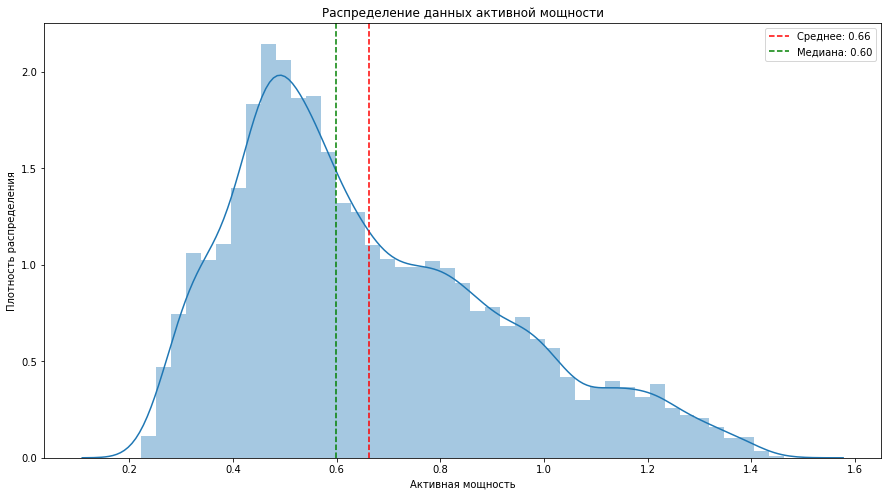

In [25]:
# отключаю предупреждение в этой ячейке, 
# закомментирую при дальнейшей работе, чтобы видеть предупреждения
import warnings 
warnings.filterwarnings('ignore')

plt.figure(figsize=(15,8))
sns.distplot(electrode_df['Активная мощность'])
plt.xlabel('Активная мощность')
plt.ylabel('Плотность распределения')
plt.title('Распределение данных активной мощности')

mean = electrode_df['Активная мощность'].mean()
median = electrode_df['Активная мощность'].median()

plt.axvline(mean, color='r', linestyle='--', label='Среднее: {:.2f}'.format(mean))
plt.axvline(median, color='g', linestyle='--', label='Медиана: {:.2f}'.format(median))
plt.legend()
plt.show()

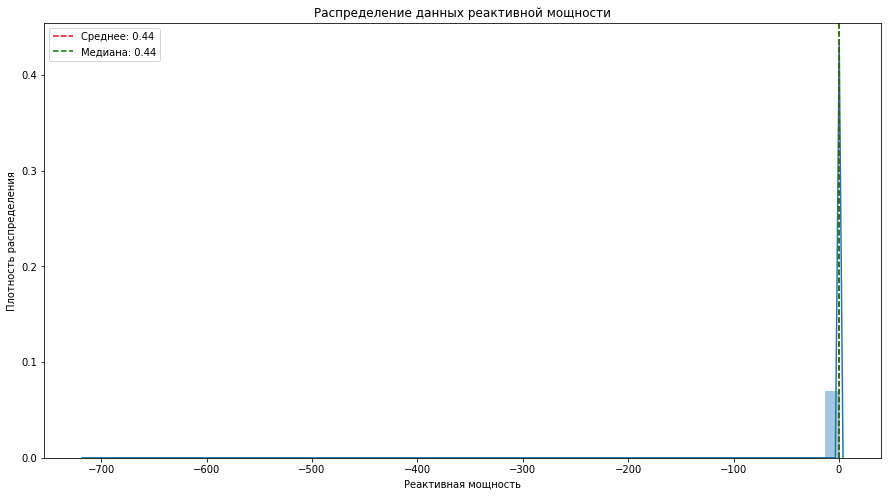

In [26]:
plt.figure(figsize=(15,8))
sns.distplot(electrode_df['Реактивная мощность'])
plt.xlabel('Реактивная мощность')
plt.ylabel('Плотность распределения')
plt.title('Распределение данных реактивной мощности')

mean = electrode_df['Реактивная мощность'].mean()
median = electrode_df['Реактивная мощность'].median()

plt.axvline(mean, color='r', linestyle='--', label='Среднее: {:.2f}'.format(mean))
plt.axvline(median, color='g', linestyle='--', label='Медиана: {:.2f}'.format(median))
plt.legend()
plt.show()

Из-за выбросов не можем рассмотреть все данные, построим гистограмму histplot. Ограничим значения по оси X.

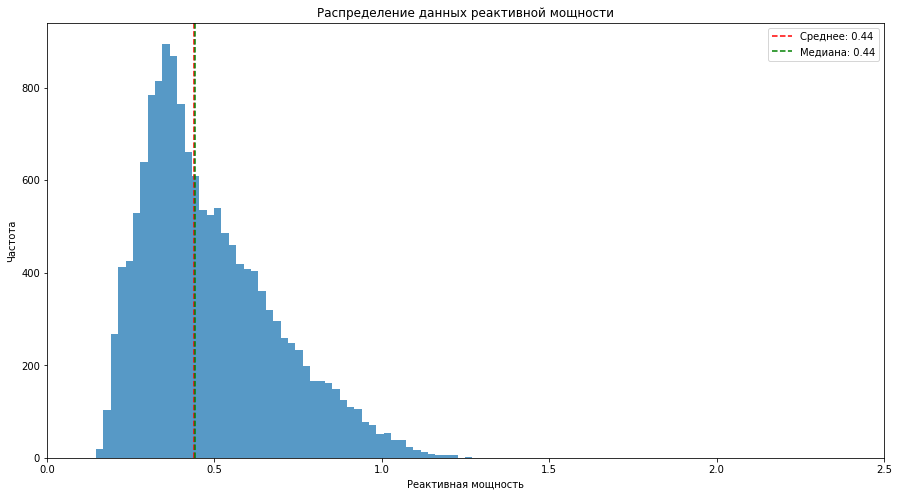

In [27]:
plt.figure(figsize=(15,8))
sns.histplot(electrode_df['Реактивная мощность'])
plt.xlabel('Реактивная мощность')
plt.ylabel('Частота')
plt.xlim(0,2.5)
plt.title('Распределение данных реактивной мощности')

mean = electrode_df['Реактивная мощность'].mean()
median = electrode_df['Реактивная мощность'].median()

plt.axvline(mean, color='r', linestyle='--', label='Среднее: {:.2f}'.format(mean))
plt.axvline(median, color='g', linestyle='--', label='Медиана: {:.2f}'.format(median))
plt.legend()
plt.show()

Теперь мы имеем представление, что значения активной и реактивной мощности находятся в пределах от 0 до 1.5. Данные распределены нормально, но в столбце "Реактивная мощность" есть выбросы. 

2) Данные о подаче сыпучих материалов (объём).

In [28]:
# создаем функцию для вывода гистограмм всех столбцов таблицы
def create_histograms(df):
    for col in df.columns:
        plt.figure()
        plt.hist(df[col].dropna())
        plt.title(f"Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

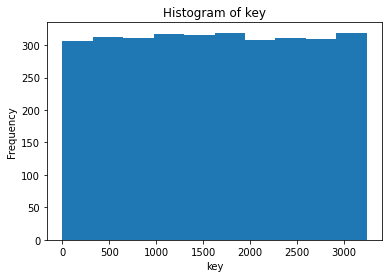

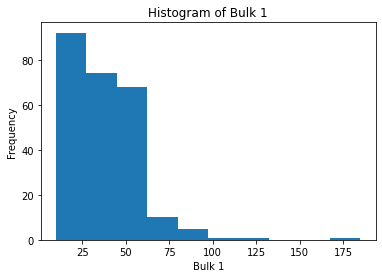

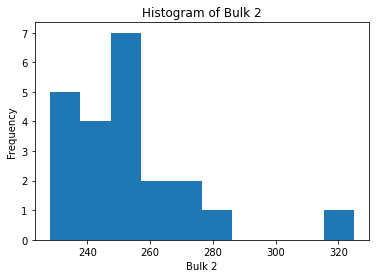

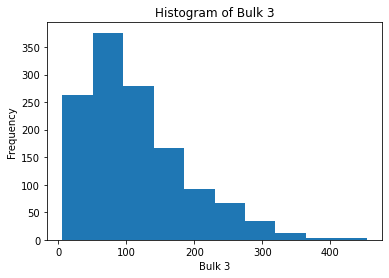

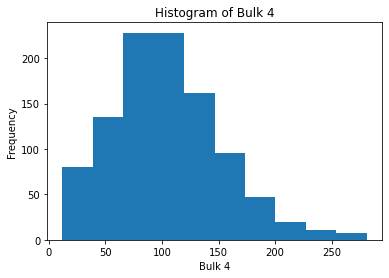

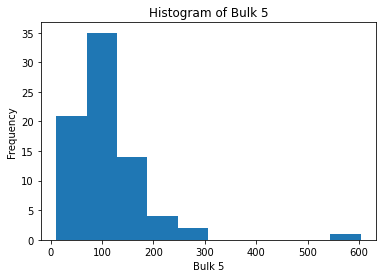

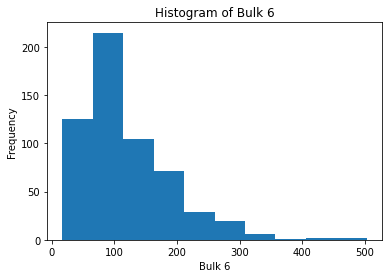

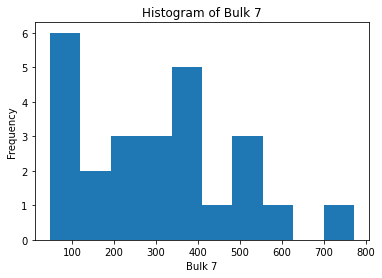

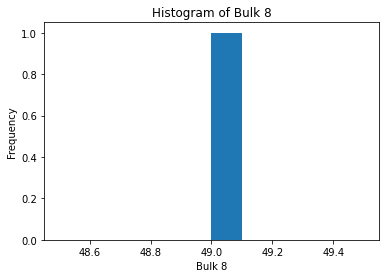

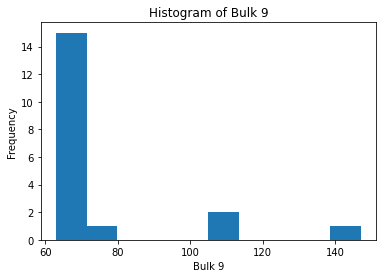

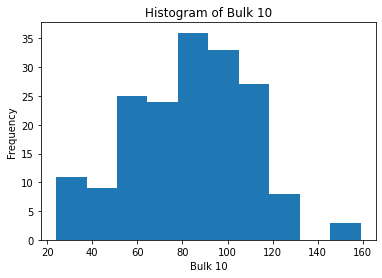

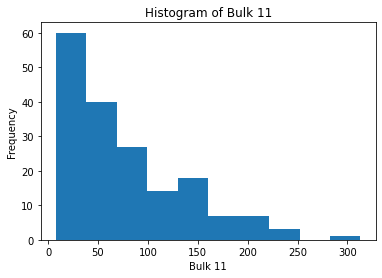

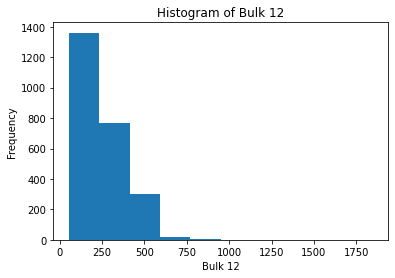

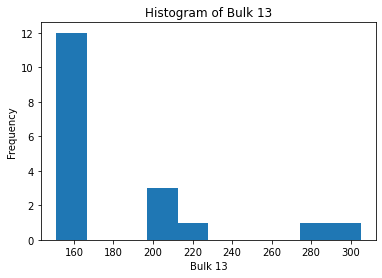

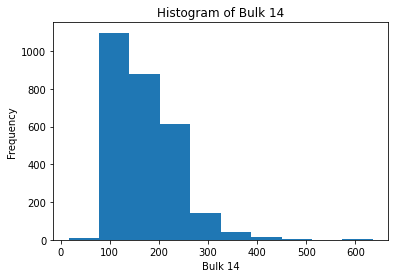

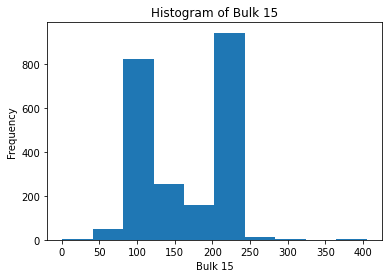

In [29]:
# применяем функцию вывода гистограмм
create_histograms(bulk_volume_df)

Данные стадий Bulk 8, Bulk 9, Bulk 13, Bulk 15 не имеют нормального распределения. В особенности выделяется Bulk 8, что мы уже замечали ранее. 

3) Данные о проволочных материалах (объём).

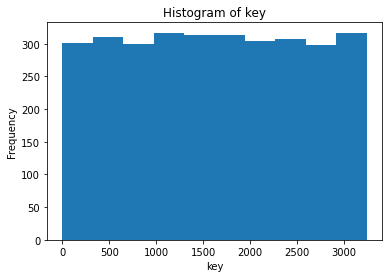

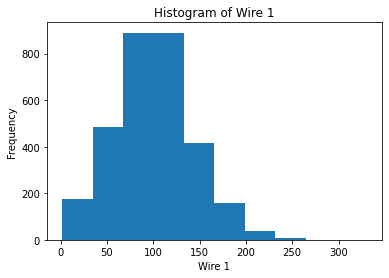

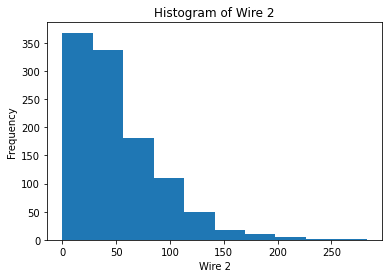

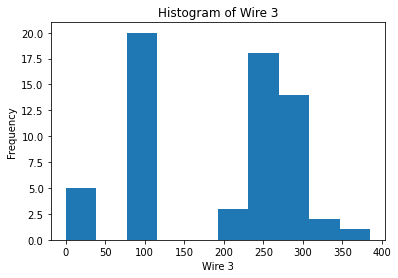

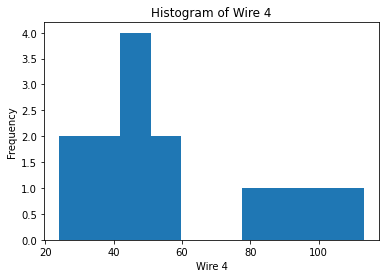

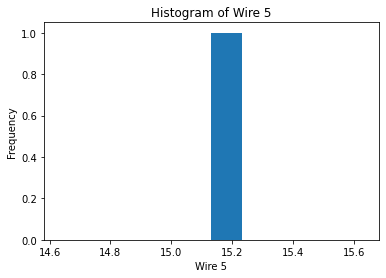

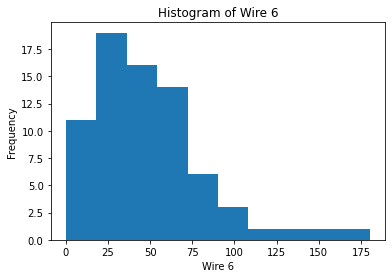

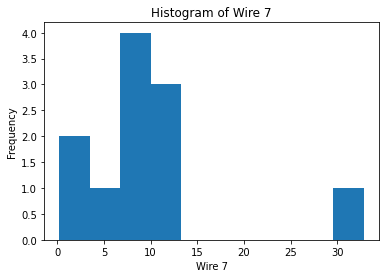

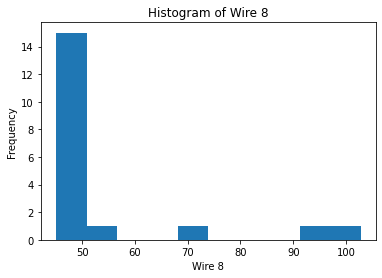

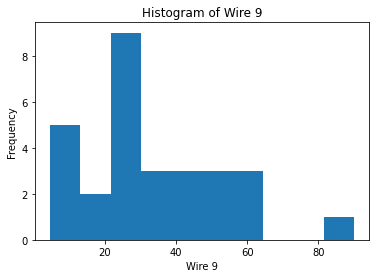

In [30]:
# применяем функцию вывода гистограмм
create_histograms(wire_volume_df)

После стадии Wire 2 данные не имеют нормального распределения, особенно выделяется Wire 5. 

4) Данные о продувке сплава газом.

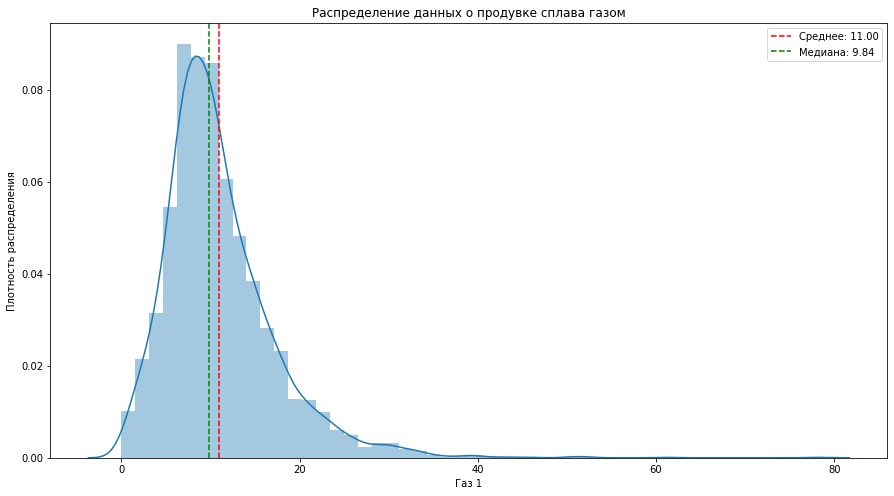

In [31]:
plt.figure(figsize=(15,8))
sns.distplot(gas_df['Газ 1'])
plt.xlabel('Газ 1')
plt.ylabel('Плотность распределения')
plt.title('Распределение данных о продувке сплава газом')

mean = gas_df['Газ 1'].mean()
median = gas_df['Газ 1'].median()

plt.axvline(mean, color='r', linestyle='--', label='Среднее: {:.2f}'.format(mean))
plt.axvline(median, color='g', linestyle='--', label='Медиана: {:.2f}'.format(median))
plt.legend()
plt.show()

Данные распределены нормально, но следует проверить выбросы. 

5) Результаты измерения температуры.

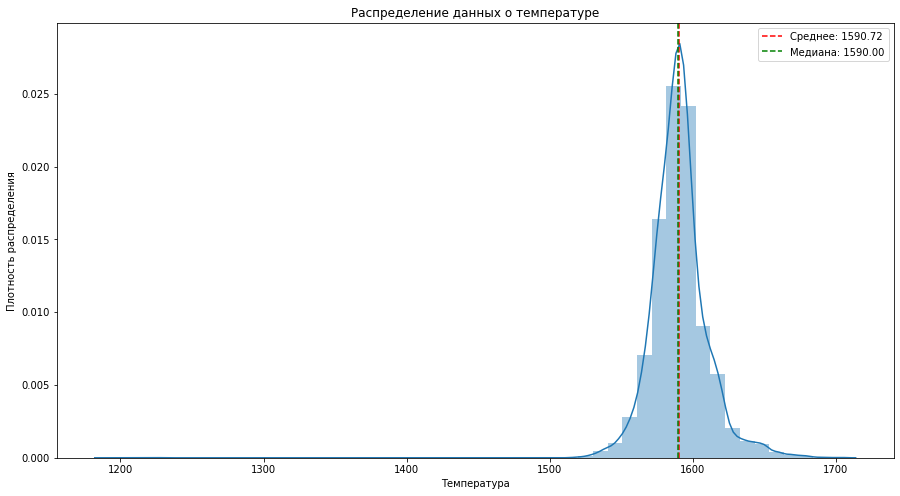

In [32]:
plt.figure(figsize=(15,8))
sns.distplot(temperature_df['Температура'])
plt.xlabel('Температура')
plt.ylabel('Плотность распределения')
plt.title('Распределение данных о температуре')

mean = temperature_df['Температура'].mean()
median = temperature_df['Температура'].median()

plt.axvline(mean, color='r', linestyle='--', label='Среднее: {:.2f}'.format(mean))
plt.axvline(median, color='g', linestyle='--', label='Медиана: {:.2f}'.format(median))
plt.legend()
plt.show()

В основном значения от 1500 до 1700, видны явные выбросы. 

**Промежуточный вывод** <br>

Было выявлено, что данные в таблицах о подаче сыпучих и проволочных материалах не везде имеют нормальное распределение и не везде достаточны. Возможно, потребуется масштабирование этих данных или намеренный отказ от них. В остальных данных имеются выбросы, следует рассмотреть их подробнее и произвести очистку. 

### Вывод по разделу "Первичный анализ данных". 

Выполнен первичный анализ данных. Рассмотрено 7 датасетов, размерностью от 3000+ до 18000+ строк и от 3 до 16 столбцов. С помощью метода head были просмотрены первые строки датасетов. Выявлено, что все датасеты имеют столбец key (номер партии), по которому мы можем объединить необходимые данные в один датасет. Методами info и isna выявлены неверные типы данных, наличие пропусков, и прочие отклонения, которые необходимо устранить в предобработке данных. Графический анализ указал на выбросы в данных, которые необходимо изучить подробнее и при необходимости устранить, а также на неполноту данных в стадиях подачи сыпучих и проволочных материалов. Неполные данные необходимо масштабировать, либо отказаться от них. Решение будет принято после исследовательского анализа данных и консультации с заказчиком. 

Выделим ключевые шаги предобработки данных:
- все названия столбцов записать без пропусков и использовать строчные латинские символы
- перевести все строки (18000+), содержащие дату, в формат datetime
- проработать пропуски значений (присутствуют в 6 датасетах из 7)

Прочие наблюдения: <br>
1) Данные о подаче сыпучих материалов (время) могут быть не значимым признаком. Если это подтвердится при дальнейшем анализе, есть вероятность, что они не будут использоваться для обучения модели.  
2) Данные о проволочных материалах (время) могут быть не значимым признаком. Если это подтвердится при дальнейшем анализе, есть вероятность, что они не будут использоваться для обучения модели.  

### Список вопросов бизнесу о технологическом процессе.

1) Как прогнозная модель по температуре поможет в энергосбережении? <br>
2) Какой смысл несут данные в столбцах "Активная мощность" и "Реактивная мощность", в каких единицах измерения они выражены? <br>
3) Как выстроен процесс подачи сыпучих материалов, почему их именно 15?<br> 
4) Можно ли объяснить наличие большого количества пропусков тем, что сыпучие материалы не подавались и заменить   пропуск на нулевое значение?<br> 
5) Является ли правдоподобным тот факт, что для 8 подачи (Bulk 8) есть данные только для одной партии?<br>
6) Как устроен процесс продувки сплава газом, какие именно данные нам предоставлены? Почему здесь только одна итерация, продувка осуществляется только один раз для партии, или указан суммарный объем после всех итераций (после ка-ждого добавления сыпучих материалов и пр. в партию)?<br>
7) Для чего в принципе осуществляется продувка газом? Этот процесс может влиять на температуру стали?<br>
8) Пропуски в данных о температуре появились в конце наблюдений (июнь) - есть ли возможность восстановить эти данные?<br>
9) Как выстроен процесс подачи проволочных материалов, почему их именно 9?<br> 
10) Можно ли объяснить наличие большого количества пропусков тем, что проволочные материалы не подавались и заменить   пропуск на нулевое значение?<br> 
11) Является ли правдоподобным тот факт, что для 5 подачи (Wire 5) есть данные только для одной партии? 

## Предобработка данных и исследовательский анализ

### Предобработка данных

Для улучшения качества исходных данных и предотвращения ошибкок в дальнейшем анализе выполним предобработку данных.

1) Данные об электродах  **electrode_df**.

Изменение имходной таблицы:<br>
- Названия столбцов необходимо записать без пропусков и использовать строчные латинские символы
- Начало и конец нагрева дугой перевести в формат datetime
- Удалить выбросы

Создание новой таблицы:<br>
- Рассчитать и добавить столбец с временем нагрева <br>
- Рассчитать и добавить столбец с полной мощностью
- Оставить только нужные столбцы для дальнейшего формирования единого датасета

<center>Изменение исходной таблицы.<center>

In [33]:
# Переименование столбцов
electrode_df = electrode_df.rename(columns={
    'Начало нагрева дугой': 'arc_heat_start',
    'Конец нагрева дугой': 'arc_heat_end',
    'Активная мощность': 'active_power',
    'Реактивная мощность': 'reactive_power'
})

In [34]:
# Изменение типа данных в столбцах arc_heat_start и arc_heat_end
electrode_df['arc_heat_start'] = pd.to_datetime(electrode_df['arc_heat_start'])
electrode_df['arc_heat_end'] = pd.to_datetime(electrode_df['arc_heat_end'])

In [35]:
# Проверка результата предобработки 1
electrode_df.head()

,key,arc_heat_start,arc_heat_end,active_power,reactive_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691


In [36]:
# Проверка результата предобработки 2
electrode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   key             14876 non-null  int64         
 1   arc_heat_start  14876 non-null  datetime64[ns]
 2   arc_heat_end    14876 non-null  datetime64[ns]
 3   active_power    14876 non-null  float64       
 4   reactive_power  14876 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB


Ранее в столбце reactive_power были выявлены выбросы. Рассмотрим их подробнее и устраним. 

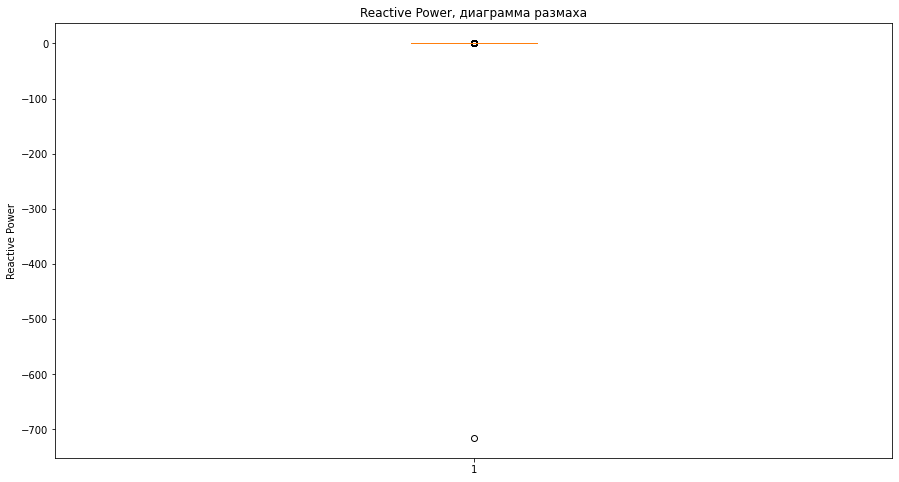

In [37]:
# Строим ящик с усами для столбца reactive_power
fig, ax = plt.subplots(figsize=(15,8))
ax.boxplot(electrode_df['reactive_power'])
ax.set_title('Reactive Power, диаграмма размаха')
ax.set_ylabel('Reactive Power')
plt.show()

Устраним очевидный выброс. Если это не последня строка по партии - удалим только значение. А если последняя - тогда удалим всю партию.

In [38]:
print(electrode_df.loc[electrode_df['reactive_power'] < -600])

       key      arc_heat_start        arc_heat_end  active_power  \
9780  2116 2019-07-28 02:22:08 2019-07-28 02:23:57      0.705344   

      reactive_power  
9780     -715.479924  


In [39]:
value = electrode_df.loc[9780, 'reactive_power']

# сортировка данных по столбцу "arc_heat_start"
df_sorted = electrode_df.sort_values(by=['arc_heat_start'])

# группировка данных по партиям "key"
df_grouped = df_sorted.groupby('key')

# определение последнего значения "reactive_power" в каждой группе
last_reactive_power = df_grouped['reactive_power'].last()

# проверка
if value in last_reactive_power:
    print("Удаляем значение")
else:
    print("Удаляем всю партию")

Удаляем всю партию


In [40]:
# удаляем всю партию
electrode_df = electrode_df.drop(electrode_df[electrode_df['key'] == 2116].index)

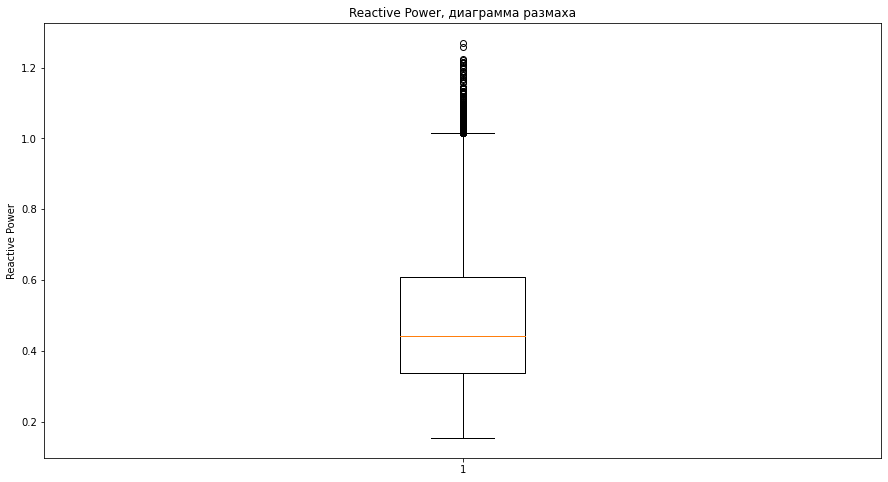

In [41]:
# Снова строим ящик с усами для столбца reactive_power
fig, ax = plt.subplots(figsize=(15,8))
ax.boxplot(electrode_df['reactive_power'])
ax.set_title('Reactive Power, диаграмма размаха')
ax.set_ylabel('Reactive Power')
plt.show()

Сверхвыброс удален.

<center>Создание и изменение копии таблицы.<center>

Во избежание раздутия размерности будущего объединенного датасета, рассчитаем время нагрева дуги в секундах, а также полную мощность по формуле, предоставленной заказчиком.

In [42]:
# создание копии таблицы electrode_df
cc_electrode_df = electrode_df.copy()
# добавление столбца с рассчитанным временем нагрева дуги
cc_electrode_df['arc_heat_time_sec'] =  (
    cc_electrode_df['arc_heat_end'] - cc_electrode_df['arc_heat_start']).dt.total_seconds()

In [43]:
# Проверка результата предобработки копии исходной таблицы v1
cc_electrode_df.head()

,key,arc_heat_start,arc_heat_end,active_power,reactive_power,arc_heat_time_sec
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253,228.0
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438,185.0
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460,172.0
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979,365.0
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691,148.0


По формуле, предоставленной заказчиком, рассчитаем полную мощность и добавим столбец в таблицу. Формула полной мощности:

$$
S = sqrt(P^2 + Q^2)
$$

, где S - полная мощность, P - активная мощность и Q - реактивная мощность. 
Таким образом, мы получаем значение полной мощности S в вольтах-амперах (VA).

In [44]:
# добавление столбца с полной мощностью
cc_electrode_df['apparent_power'] = np.sqrt(cc_electrode_df['active_power']**2 + cc_electrode_df['reactive_power']**2)
# Проверка результата предобработки копии исходной таблицы v3
cc_electrode_df.head()

,key,arc_heat_start,arc_heat_end,active_power,reactive_power,arc_heat_time_sec,apparent_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253,228.0,0.371123
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438,185.0,0.902319
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460,172.0,0.722536
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979,365.0,0.642824
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691,148.0,1.079934


После добавления столбцов с временем нагрева и полной мощностью, столбцы с временем начала и конца нагрева, активной и реактивной мощностью можно убрать из таблицы. 

In [45]:
# Удаление столбцов active_power и reactive_power
cc_electrode_df = cc_electrode_df.drop(['active_power', 'reactive_power','arc_heat_start', 'arc_heat_end'], axis = 1)

In [46]:
# Проверка результата предобработки копии исходной таблицы v4
cc_electrode_df.head()

,key,arc_heat_time_sec,apparent_power
0,1,228.0,0.371123
1,1,185.0,0.902319
2,1,172.0,0.722536
3,1,365.0,0.642824
4,1,148.0,1.079934


Сгруппируем данные по номеру партии **key**.

In [47]:
# группировка по столбцу key и суммирование значений
cc_electrode_df = cc_electrode_df.groupby('key').sum().reset_index()
# Проверка результата предобработки копии исходной таблицы v5
cc_electrode_df.head()

,key,arc_heat_time_sec,apparent_power
0,1,1098.0,3.718736
1,2,811.0,2.588349
2,3,655.0,5.019223
3,4,741.0,3.400038
4,5,869.0,2.816980


Рассмотрим данные после группировки на графиках. 

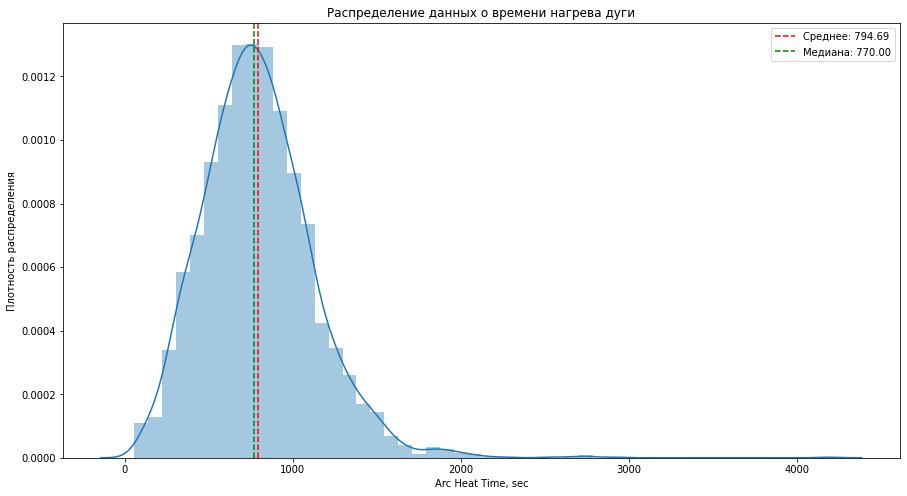

In [48]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.distplot(cc_electrode_df['arc_heat_time_sec'], ax=ax)
ax.set_xlabel('Arc Heat Time, sec')
ax.set_ylabel('Плотность распределения')
ax.set_title('Распределение данных о времени нагрева дуги')

mean = cc_electrode_df['arc_heat_time_sec'].mean()
median = cc_electrode_df['arc_heat_time_sec'].median()

ax.axvline(mean, color='r', linestyle='--', label='Среднее: {:.2f}'.format(mean))
ax.axvline(median, color='g', linestyle='--', label='Медиана: {:.2f}'.format(median))
ax.legend()
plt.show()

Данные о времени нагрева дуги имеют нормальное распределение. 

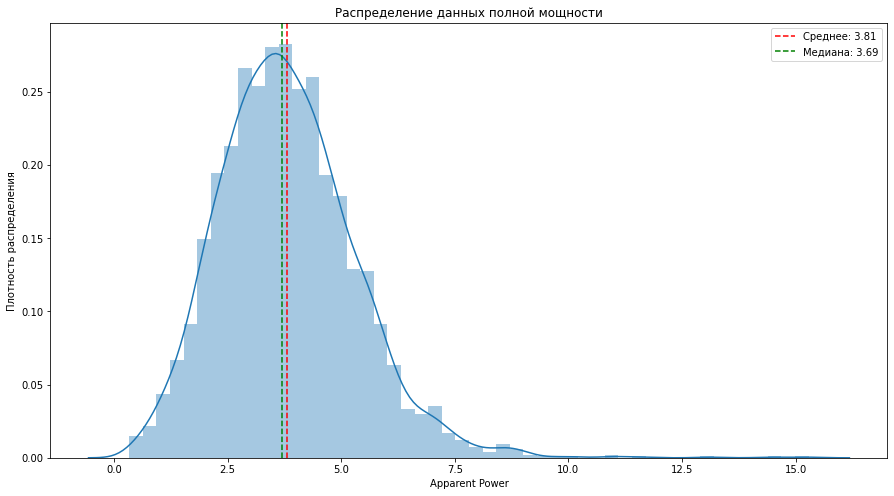

In [49]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.distplot(cc_electrode_df['apparent_power'], ax=ax)
ax.set_xlabel('Apparent Power')
ax.set_ylabel('Плотность распределения')
ax.set_title('Распределение данных полной мощности')

mean = cc_electrode_df['apparent_power'].mean()
median = cc_electrode_df['apparent_power'].median()

ax.axvline(mean, color='r', linestyle='--', label='Среднее: {:.2f}'.format(mean))
ax.axvline(median, color='g', linestyle='--', label='Медиана: {:.2f}'.format(median))
ax.legend()
plt.show()

Рассмотрим итог предобработки таблицы cc_electrode_df. 

In [50]:
cc_electrode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3213 entries, 0 to 3212
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                3213 non-null   int64  
 1   arc_heat_time_sec  3213 non-null   float64
 2   apparent_power     3213 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 75.4 KB


**Промежуточный вывод**

В таблице electrode_df была произведена предбработка данных и устранены сверхвыбросы. Для дальнейшей работы были добавлены столбцы arc_heat_time_sec - время нагрева дуги, рассчитаное из разницы конечного и начального времени нагрева, и apparent_power - полная мощность, рассчитанная как квадратный корень из суммы квадратов активной и реактивной мощности. Итоговая таблца сформирована методом группировки по столбцу key - номер партии. Она состоит из 3213 строк и 3 столбцов - key, arc_heat_time_sec и apparent_power.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 3</b></u></p>Хорошо!!!

2) Данные о подаче сыпучих материалов (объём) **bulk_volume_df**.

Преобразование исходной таблицы:<br>
- названия столбцов записать без пропусков и использовать строчные символы <br>


Создание копии таблицы: <br>
- столбцы с "редкими" значениями соединить в один столбец
- обработка пропусков, замена пропусков на нулевые значения

<center>Изменение исходной таблицы.<center>

In [51]:
# приведение столбцов к нижнему регистру и запись без пробелов
bulk_volume_df.columns = bulk_volume_df.columns.str.lower().str.replace(' ', '')

# проверка результата
bulk_volume_df.head()

,key,bulk1,bulk2,bulk3,bulk4,bulk5,bulk6,bulk7,bulk8,bulk9,bulk10,bulk11,bulk12,bulk13,bulk14,bulk15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


<center>Создание и изменение копии таблицы.<center>

In [52]:
# создание копии таблицы
cc_bulk_volume_df = bulk_volume_df.copy()

Выведем на экран таблицу с процентами заполнения каждой ячейки. 

In [53]:
# функция выводит на экран процент заполнения каждого столбца таблицы
def create_summary_table(df):
    # рассчет процента заполнения каждого столбца
    fill_percentages = (1 - df.isna().mean()) * 100

    # cоздание сводной таблицы
    summary_table = pd.DataFrame({
        'Column Name': df.columns,
        'Fill Percentage': fill_percentages
    })

    # заливка ячеек таблицы
    summary_table = summary_table.style.background_gradient(
        cmap='RdYlGn',
        subset=['Fill Percentage']
    )

    # вывод сводной таблицы
    return summary_table

In [54]:
summary_table = create_summary_table(cc_bulk_volume_df)
summary_table

,Column Name,Fill Percentage
key,key,100.000000
bulk1,bulk1,8.053691
bulk2,bulk2,0.703100
bulk3,bulk3,41.482902
bulk4,bulk4,32.406520
bulk5,bulk5,2.460850
bulk6,bulk6,18.408437
bulk7,bulk7,0.798977
bulk8,bulk8,0.031959
bulk9,bulk9,0.607223


При малом количестве информации модель будет плохо обучаться. Соединим наиболее редкие значения в один столбец. 

In [55]:
# функция суммирует столбцы с номерами bulk|wire, которые мы передаем и удаляем исходные столбцы
def sum_bulk_or_wire_volumes(numbers, df, prefix):
    sum_columns = [f'{prefix}{num}' for num in numbers]
    sum_values = df[sum_columns].sum(axis=1)
    df.drop(columns=sum_columns, inplace=True)
    return sum_values

bulk_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13]
bulk_sum = sum_bulk_or_wire_volumes(bulk_numbers, cc_bulk_volume_df, 'bulk')
cc_bulk_volume_df['bulk_rare'] = bulk_sum

Посмотрим результат.

In [56]:
summary_table = create_summary_table(cc_bulk_volume_df)
summary_table

,Column Name,Fill Percentage
key,key,100.000000
bulk12,bulk12,78.299776
bulk14,bulk14,89.677213
bulk15,bulk15,71.844040
bulk_rare,bulk_rare,100.000000


Заполним пропущенные значения нулями. 

In [57]:
cc_bulk_volume_df = cc_bulk_volume_df.fillna(0)

In [58]:
cc_bulk_volume_df.isna().sum()

key          0
bulk12       0
bulk14       0
bulk15       0
bulk_rare    0
dtype: int64

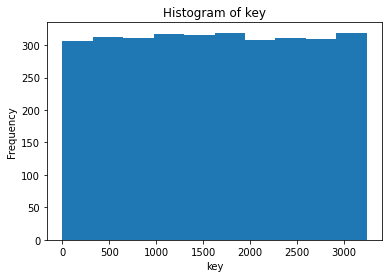

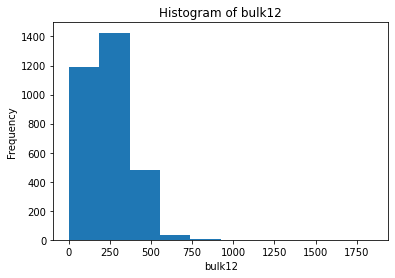

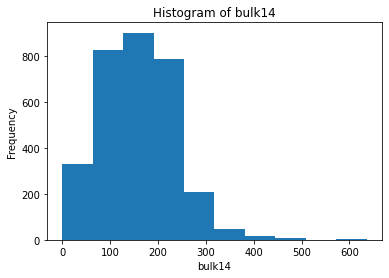

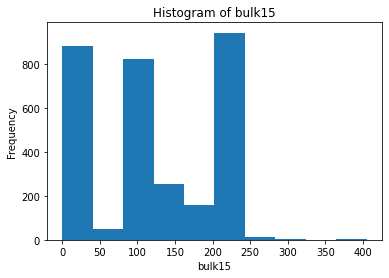

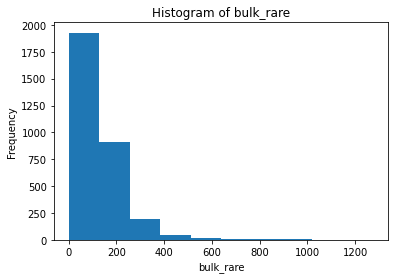

In [59]:
# применяем функцию вывода гистограмм
create_histograms(cc_bulk_volume_df)

Рассмотрим итог предобработки cc_bulk_volume_df.

In [60]:
cc_bulk_volume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   key        3129 non-null   int64  
 1   bulk12     3129 non-null   float64
 2   bulk14     3129 non-null   float64
 3   bulk15     3129 non-null   float64
 4   bulk_rare  3129 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 122.4 KB


3) Данные о проволочных материалах (объём) **wire_volume_df**.

Преобразование исходной таблицы:<br>
- названия столбцов записать без пропусков и использовать строчные символы <br>

Создание копии таблицы: <br>
- столбцы с "редкими" значениями соединить в один столбец
- обработка пропусков, замена пропусков на нулевые значения

<center>Изменение исходной таблицы.<center>

In [61]:
# приведение столбцов к нижнему регистру и запись без пробелов
wire_volume_df.columns = wire_volume_df.columns.str.lower().str.replace(' ', '')

# проверка результата
wire_volume_df.head()

,key,wire1,wire2,wire3,wire4,wire5,wire6,wire7,wire8,wire9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<center>Создание и изменение копии таблицы.<center>

In [62]:
# создание копии таблицы
cc_wire_volume_df = wire_volume_df.copy()

In [63]:
# функция выводит на экран процент заполнения каждого столбца таблицы
summary_table_wire = create_summary_table(cc_wire_volume_df)
summary_table_wire

,Column Name,Fill Percentage
key,key,100.000000
wire1,wire1,99.156118
wire2,wire2,35.021097
wire3,wire3,2.044791
wire4,wire4,0.454398
wire5,wire5,0.032457
wire6,wire6,2.369361
wire7,wire7,0.357027
wire8,wire8,0.616683
wire9,wire9,0.941253


Соединим наиболее редкие значения в один столбец. 

In [64]:
# функция суммирует столбцы с номерами bulk|wire, которые мы передаем и удаляем исходные столбцы
wire_numbers = [2, 3, 4, 5, 6, 7, 8, 9]
wire_sum = sum_bulk_or_wire_volumes(wire_numbers, cc_wire_volume_df, 'wire')
cc_wire_volume_df['wire_rare'] = wire_sum

Посмотрим результат

In [65]:
summary_table_wire = create_summary_table(cc_wire_volume_df)
summary_table_wire

,Column Name,Fill Percentage
key,key,100.000000
wire1,wire1,99.156118
wire_rare,wire_rare,100.000000


Заполним пропущенные значения нулями.

In [66]:
cc_wire_volume_df = cc_wire_volume_df.fillna(0)
# проверим результат
cc_wire_volume_df.isna().sum()

key          0
wire1        0
wire_rare    0
dtype: int64

Рассмотрим итог предобработки cc_wire_volume_df.

In [67]:
cc_wire_volume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   key        3081 non-null   int64  
 1   wire1      3081 non-null   float64
 2   wire_rare  3081 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 72.3 KB


4) Данные о продувке сплава газом **gas_df**. 

Преобразование исходной таблицы:<br>
- названия столбцов записать без пропусков и использовать строчные латинские символы <br>

<center>Изменение исходной таблицы.<center>

In [68]:
# Переименование столбцов
gas_df = gas_df.rename(columns={
    'Газ 1': 'gas1',
})
# проверка результата
gas_df.head()

,key,gas1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


In [69]:
gas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   gas1    3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


<center>Создание и изменение копии таблицы.<center>

In [70]:
# создание копии таблицы
cc_gas_df = gas_df.copy()

Рассмотрим данные в столбце gas1 на диаграмме размаха. 

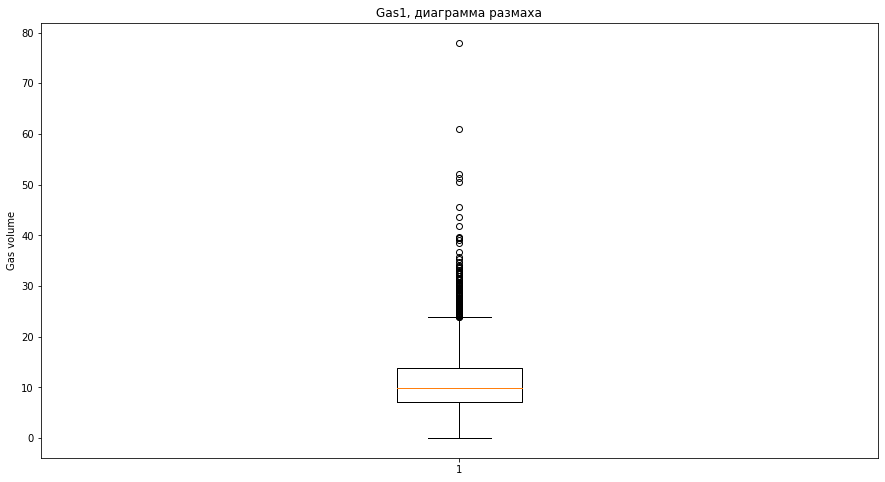

In [71]:
fig, ax = plt.subplots(figsize=(15,8))
ax.boxplot(cc_gas_df['gas1'])
ax.set_title('Gas1, диаграмма размаха')
ax.set_ylabel('Gas volume')
plt.show()

Есть выбросы, но не критичные. В дальнейшем очистим их на обучающей выборке.  

Рассмотрим итог предобработки. 


In [72]:
cc_gas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   gas1    3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


**Промежуточный вывод**<br>

Названия столбцов записаны латинскими буквами нижнего регистра без пробелов. 

5) Результаты измерения температуры **temperature_df**.

Преобразование исходной таблицы:<br>
- названия столбцов записать без пропусков и использовать строчные латинские символы <br>
- время замера перевести в формат datetime


Создание и изменение копии таблицы: <br>
- удалить пропущенные значения

<center>Изменение исходной таблицы.<center>

In [73]:
# Переименование столбцов
temperature_df = temperature_df.rename(columns={
    'Время замера': 'measurement_time',
    'Температура': 'temperature'
})
# проверка результата
temperature_df.head()

,key,measurement_time,temperature
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


In [74]:
# Изменение типа данных в столбцах arc_heat_start и arc_heat_end
temperature_df['measurement_time'] = pd.to_datetime(temperature_df['measurement_time'])

In [75]:
temperature_df.head()

,key,measurement_time,temperature
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


<center>Создание и изменение копии таблицы.<center>

In [76]:
# создание копии таблицы
cc_temperature_df = temperature_df.copy()

Столбец Температура содержит в себе целевой признак. Удалим партии с пропущенными значениями температуры. 

In [77]:
missing_temper = cc_temperature_df[cc_temperature_df.isnull().any(axis=1)]
keys_to_remove = missing_temper['key'].unique()

In [78]:
cc_temperature_df = cc_temperature_df.drop(index=cc_temperature_df[cc_temperature_df['key'].isin(keys_to_remove)].index)

In [79]:
cc_temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13926 entries, 0 to 13925
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   key               13926 non-null  int64         
 1   measurement_time  13926 non-null  datetime64[ns]
 2   temperature       13926 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 435.2 KB


Изучим выбросы

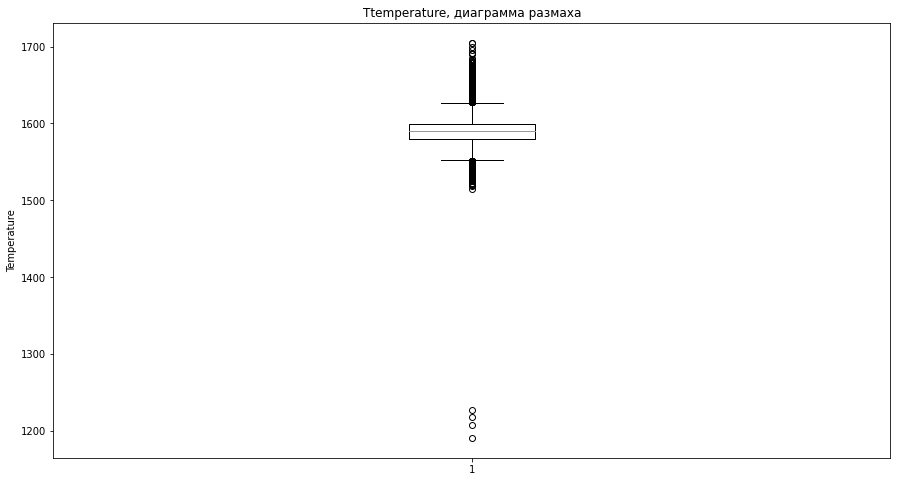

In [80]:
fig, ax = plt.subplots(figsize=(15,8))
ax.boxplot(cc_temperature_df['temperature'])
ax.set_title('Ttemperature, диаграмма размаха')
ax.set_ylabel('Temperature')
plt.show()

Удалим сверхвыбросы.

In [81]:
cc_temperature_df = cc_temperature_df[cc_temperature_df['temperature'] > 1450] 

Дальнейшую предобработку произведем после объединения датасетов.

### Объединение исходных датасетов в единый датасет.

Объединим признаки в единый датасет. 

In [82]:
# объединение датасетов по ключевому столбцу key
features = pd.merge(cc_electrode_df, cc_bulk_volume_df, on='key', how='inner')
features = pd.merge(features, cc_wire_volume_df, on='key', how='inner')
features = pd.merge(features, cc_gas_df, on='key', how='inner')

In [83]:
features.head()

,key,arc_heat_time_sec,apparent_power,bulk12,bulk14,bulk15,bulk_rare,wire1,wire_rare,gas1
0,1,1098.0,3.718736,206.0,150.0,154.0,43.0,60.059998,0.00000,29.749986
1,2,811.0,2.588349,206.0,149.0,154.0,73.0,96.052315,0.00000,12.555561
2,3,655.0,5.019223,205.0,152.0,153.0,34.0,91.160157,0.00000,28.554793
3,4,741.0,3.400038,207.0,153.0,154.0,81.0,89.063515,0.00000,18.841219
4,5,869.0,2.816980,203.0,151.0,152.0,78.0,89.238236,9.11456,5.413692


Проработаем таблицу, содержащую целевой признак. Запишем в переменную temperatures только первые измерения температуры.

In [84]:
# получение первого измерения температуры для каждого значения ключа
temperatures = cc_temperature_df.groupby('key')['temperature'].first()

# сброс индекса и преобразование в DataFrame
temperatures = temperatures.reset_index(name='first_temperature')
temperatures.head()

,key,first_temperature
0,1,1571.0
1,2,1581.0
2,3,1596.0
3,4,1601.0
4,5,1576.0


Добавим в признаки значение первой температуры.

In [85]:
features = pd.merge(features, temperatures, on='key', how='inner')
features.head()

,key,arc_heat_time_sec,apparent_power,bulk12,bulk14,bulk15,bulk_rare,wire1,wire_rare,gas1,first_temperature
0,1,1098.0,3.718736,206.0,150.0,154.0,43.0,60.059998,0.00000,29.749986,1571.0
1,2,811.0,2.588349,206.0,149.0,154.0,73.0,96.052315,0.00000,12.555561,1581.0
2,3,655.0,5.019223,205.0,152.0,153.0,34.0,91.160157,0.00000,28.554793,1596.0
3,4,741.0,3.400038,207.0,153.0,154.0,81.0,89.063515,0.00000,18.841219,1601.0
4,5,869.0,2.816980,203.0,151.0,152.0,78.0,89.238236,9.11456,5.413692,1576.0


In [86]:
features

,key,arc_heat_time_sec,apparent_power,bulk12,bulk14,bulk15,bulk_rare,wire1,wire_rare,gas1,first_temperature
0,1,1098.0,3.718736,206.0,150.0,154.0,43.0,60.059998,0.00000,29.749986,1571.0
1,2,811.0,2.588349,206.0,149.0,154.0,73.0,96.052315,0.00000,12.555561,1581.0
2,3,655.0,5.019223,205.0,152.0,153.0,34.0,91.160157,0.00000,28.554793,1596.0
3,4,741.0,3.400038,207.0,153.0,154.0,81.0,89.063515,0.00000,18.841219,1601.0
4,5,869.0,2.816980,203.0,151.0,152.0,78.0,89.238236,9.11456,5.413692,1576.0
...,...,...,...,...,...,...,...,...,...,...,...
2323,2495,723.0,3.868721,256.0,129.0,223.0,111.0,89.150879,0.00000,7.125735,1570.0
2324,2496,940.0,5.070316,256.0,129.0,226.0,185.0,114.179527,0.00000,9.412616,1554.0
2325,2497,569.0,4.360918,230.0,124.0,226.0,85.0,94.086723,9.04800,6.271699,1571.0
2326,2498,750.0,3.909917,206.0,129.0,207.0,191.0,118.110717,0.00000,14.953657,1591.0


Запишем в переменную last_temperatures только последние значения температуры. Это целевой признак. 

In [87]:
# получение последнего измерения температуры для каждого значения ключа
last_temperatures = cc_temperature_df.groupby('key')['temperature'].last()

# сброс индекса и преобразование в DataFrame
last_temperatures = last_temperatures.reset_index(name='last_temperature')
last_temperatures.head()

,key,last_temperature
0,1,1613.0
1,2,1602.0
2,3,1599.0
3,4,1625.0
4,5,1602.0


In [88]:
last_temperatures

,key,last_temperature
0,1,1613.0
1,2,1602.0
2,3,1599.0
3,4,1625.0
4,5,1602.0
...,...,...
2472,2495,1591.0
2473,2496,1591.0
2474,2497,1589.0
2475,2498,1594.0


In [90]:
# запишем целевой признак в переменную target
target = last_temperatures['last_temperature']

Присоединим значение test_temperatures к признакам методом inner. 

In [91]:
features = pd.merge(features, last_temperatures, on='key', how='inner')
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2328 entries, 0 to 2327
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                2328 non-null   int64  
 1   arc_heat_time_sec  2328 non-null   float64
 2   apparent_power     2328 non-null   float64
 3   bulk12             2328 non-null   float64
 4   bulk14             2328 non-null   float64
 5   bulk15             2328 non-null   float64
 6   bulk_rare          2328 non-null   float64
 7   wire1              2328 non-null   float64
 8   wire_rare          2328 non-null   float64
 9   gas1               2328 non-null   float64
 10  first_temperature  2328 non-null   float64
 11  last_temperature   2328 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 236.4 KB


In [92]:
features

,key,arc_heat_time_sec,apparent_power,bulk12,bulk14,bulk15,bulk_rare,wire1,wire_rare,gas1,first_temperature,last_temperature
0,1,1098.0,3.718736,206.0,150.0,154.0,43.0,60.059998,0.00000,29.749986,1571.0,1613.0
1,2,811.0,2.588349,206.0,149.0,154.0,73.0,96.052315,0.00000,12.555561,1581.0,1602.0
2,3,655.0,5.019223,205.0,152.0,153.0,34.0,91.160157,0.00000,28.554793,1596.0,1599.0
3,4,741.0,3.400038,207.0,153.0,154.0,81.0,89.063515,0.00000,18.841219,1601.0,1625.0
4,5,869.0,2.816980,203.0,151.0,152.0,78.0,89.238236,9.11456,5.413692,1576.0,1602.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2323,2495,723.0,3.868721,256.0,129.0,223.0,111.0,89.150879,0.00000,7.125735,1570.0,1591.0
2324,2496,940.0,5.070316,256.0,129.0,226.0,185.0,114.179527,0.00000,9.412616,1554.0,1591.0
2325,2497,569.0,4.360918,230.0,124.0,226.0,85.0,94.086723,9.04800,6.271699,1571.0,1589.0
2326,2498,750.0,3.909917,206.0,129.0,207.0,191.0,118.110717,0.00000,14.953657,1591.0,1594.0


Удалим целевой признак и ключ из features и запишем его в target. 

In [93]:
target = features['last_temperature']
features = features.drop(['last_temperature', 'key'], axis=1)

### Разделение данных на обучающую и тестовую выборки.

In [94]:
# Разбиваем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=240423)

# Проверяем размеры полученных выборок
print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (1746, 10)
Размер тестовой выборки: (582, 10)


Данные успешно разделены. 

### Исследовательский анализ данных.

Проведем исследовательский анализ данных обучающей выборки. 

In [95]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1746 entries, 1933 to 1884
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   arc_heat_time_sec  1746 non-null   float64
 1   apparent_power     1746 non-null   float64
 2   bulk12             1746 non-null   float64
 3   bulk14             1746 non-null   float64
 4   bulk15             1746 non-null   float64
 5   bulk_rare          1746 non-null   float64
 6   wire1              1746 non-null   float64
 7   wire_rare          1746 non-null   float64
 8   gas1               1746 non-null   float64
 9   first_temperature  1746 non-null   float64
dtypes: float64(10)
memory usage: 150.0 KB


Данные представляют собой таблицу из 2265 строк и 11 столбцов. 

In [96]:
X_train.isna().sum()

arc_heat_time_sec    0
apparent_power       0
bulk12               0
bulk14               0
bulk15               0
bulk_rare            0
wire1                0
wire_rare            0
gas1                 0
first_temperature    0
dtype: int64

Пропуски в данных отсутствуют. 

Выведем на экран основные рассчеты для анализа данных.

In [97]:
X_train.describe()

,arc_heat_time_sec,apparent_power,bulk12,bulk14,bulk15,bulk_rare,wire1,wire_rare,gas1,first_temperature
count,1746.000000,1746.000000,1746.000000,1746.000000,1746.000000,1746.000000,1746.000000,1746.000000,1746.000000,1746.000000
mean,807.863116,3.894048,208.949026,153.317869,119.824742,126.962199,103.396804,21.295113,11.304913,1587.683276
std,340.580969,1.484593,155.521473,80.802368,84.699632,109.644938,43.437549,47.199579,6.043983,23.611102
min,57.000000,0.331897,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008399,1519.000000
25%,578.250000,2.878514,105.000000,105.000000,0.000000,62.250000,75.270777,0.000000,7.320685,1572.000000
50%,779.000000,3.787314,206.000000,149.000000,107.000000,108.000000,102.070801,0.000000,10.076888,1587.000000
75%,991.750000,4.769169,291.000000,205.000000,204.000000,168.000000,128.213287,25.040601,14.216181,1604.000000
max,4189.000000,15.288271,853.000000,450.000000,405.000000,1111.000000,330.314424,388.299187,52.142373,1660.000000


Рассмотрим на графиках, какие зависимости присутствуют. 

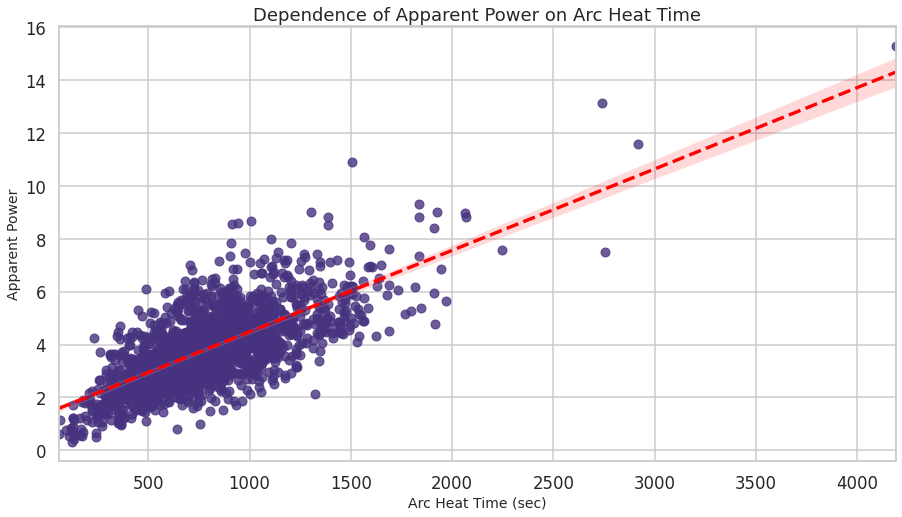

In [98]:
sns.set_style('whitegrid')
sns.set_palette('viridis')
sns.set_context('talk')

fig, ax = plt.subplots(figsize=(15, 8))
sns.regplot(x='arc_heat_time_sec', y='apparent_power', data=X_train, line_kws={'color': 'red', 'ls':'--'}, ax=ax)
ax.set_xlabel('Arc Heat Time (sec)', fontsize=14)
ax.set_ylabel('Apparent Power', fontsize=14)
ax.set_title('Dependence of Apparent Power on Arc Heat Time', fontsize=18)

plt.show()

При возрастании времени нагрева дуги, растет полная мощность. 

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИД 3</b></u></p>
    <p>классный график!</p>
</div>

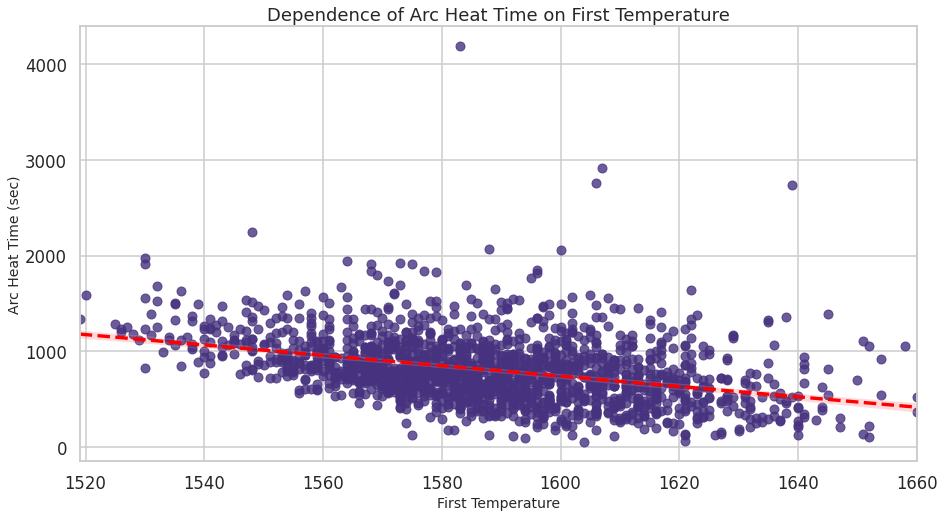

In [99]:
sns.set_style('whitegrid')
sns.set_palette('viridis')
sns.set_context('talk')

fig, ax = plt.subplots(figsize=(15, 8))
sns.regplot(x='first_temperature', y='arc_heat_time_sec', data=X_train, line_kws={'color': 'red', 'ls':'--'}, ax=ax)
ax.set_xlabel('First Temperature', fontsize=14)
ax.set_ylabel('Arc Heat Time (sec)', fontsize=14)
ax.set_title('Dependence of Arc Heat Time on First Temperature', fontsize=18)

plt.show()

Чем выше начальная температура, тем меньше общий нагрев дуги при подготовке сплава. 

Напишем функцию для избавления от выбросов. 

In [100]:
# функция очистки данных от выбросов
def remove_outliers(df, columns):
    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [101]:
# очищаем X_train
X_train_clean = remove_outliers(X_train, X_train.columns)
removed_indices = y_train[~y_train.index.isin(X_train_clean.index)].index
# сокращаем y_train с теми же индексами для корректной работы модели
y_train_clean = y_train.loc[~y_train.index.isin(removed_indices)]

X_train = X_train_clean
y_train = y_train_clean

In [102]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1332 entries, 1933 to 1884
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   arc_heat_time_sec  1332 non-null   float64
 1   apparent_power     1332 non-null   float64
 2   bulk12             1332 non-null   float64
 3   bulk14             1332 non-null   float64
 4   bulk15             1332 non-null   float64
 5   bulk_rare          1332 non-null   float64
 6   wire1              1332 non-null   float64
 7   wire_rare          1332 non-null   float64
 8   gas1               1332 non-null   float64
 9   first_temperature  1332 non-null   float64
dtypes: float64(10)
memory usage: 114.5 KB


Проработаем выбросы в целевом признаке на обучающей выборке.

In [103]:
y_train = pd.Series(y_train, name = 'target')
y_train_df = pd.DataFrame(y_train)

In [104]:
# очищаем y_train
y_train_clean = remove_outliers(y_train_df, y_train_df.columns)
# удаляем те же индексы в X_train
X_train_clean = X_train.drop(y_train_df.index.difference(y_train_clean.index))
y_train = y_train_clean
X_train = X_train_clean

### Вывод по разделу "Предобработка данных и исследовательский анализ".
Данные были изучены и предобработаны. Разрозненные датасеты соединены в единый датасет. На основе исходных признаков были созданы новые признаки. Все данные сгруппированы по ключу key. В итоговый датасет не были включены временные ряды добавления в сплав сыпучих и проволочных материалов, так как они определены как незначимые признаки. Данные разделены на обучающую и тестовую выборки. При анализе данных было выявлено, что при возрастании времени нагрева дуги, растет полная мощность. Чем выше начальная температура, тем меньше общий нагрев дуги при подготовке сплава.
После удаления выбросов на тренировочной выборке данные сократились на 573 строки. 

## Проверка данных на мультиколлинеарность.

Модели могут быть чувствительны к мультиколлинеарности. Установим порог 0.9. Если зависимость между признаками будет больше или равна 0.9, один из признаков необходимо будет удалить.

Построим корреляционную матрицу для признаков.

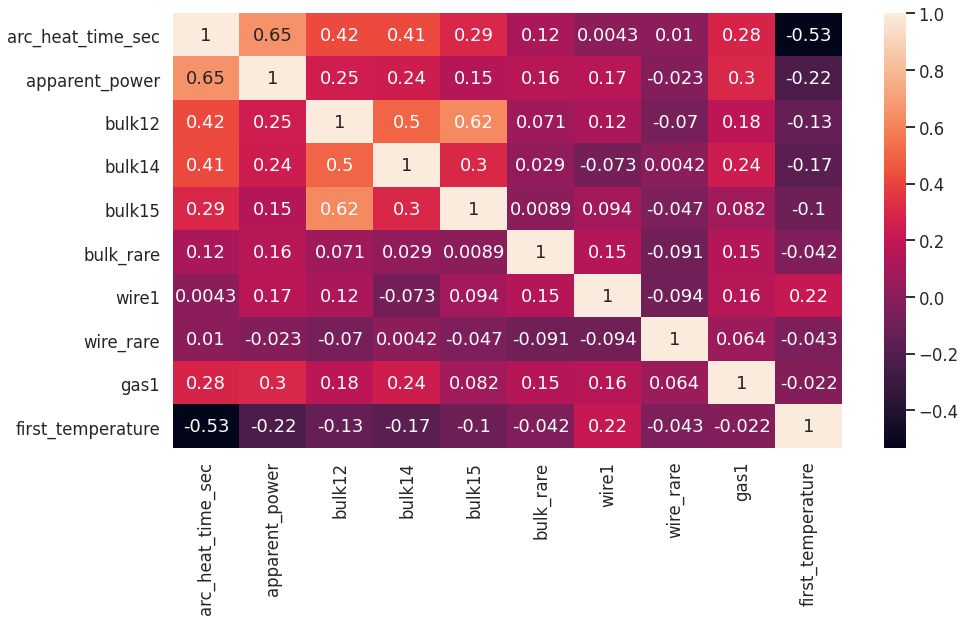

In [105]:
# Корреляционная матрица
corr_matrix = X_train.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

Самые высокие взаимосвязи показывают bulk15 и bulk12, apparent_power и arc_heat_time_sec. Они не превышают допустимого порога, но если модели будут показывать плохой результат, можно рассмотреть удаление одного из пары этих признаков. 

In [106]:
X_train_multi = X_train.drop(['bulk12'], axis=1)

X_test_multi = X_test.drop(['bulk12'], axis=1)

In [107]:
X_train_multi

,arc_heat_time_sec,apparent_power,bulk14,bulk15,bulk_rare,wire1,wire_rare,gas1,first_temperature
1933,684.0,5.802537,101.0,105.0,262.0,160.043518,0.000000,6.797259,1588.0
376,706.0,5.492642,128.0,218.0,93.0,181.350006,0.000000,14.244007,1598.0
444,486.0,3.290917,168.0,205.0,41.0,92.149200,0.000000,7.093691,1621.0
2078,698.0,3.927964,128.0,205.0,75.0,118.067039,0.000000,4.611280,1580.0
724,531.0,2.761404,0.0,0.0,21.0,120.276009,0.000000,7.464106,1592.0
...,...,...,...,...,...,...,...,...,...
826,378.0,3.745528,0.0,0.0,34.0,96.829201,50.156082,8.429642,1603.0
1682,595.0,1.848078,119.0,204.0,113.0,39.077999,0.000000,4.340270,1583.0
1365,896.0,4.632762,0.0,0.0,84.0,137.077194,0.000000,11.599899,1576.0
1,811.0,2.588349,149.0,154.0,73.0,96.052315,0.000000,12.555561,1581.0


Используем метод, VIF - показатель, который оценивает, насколько сильно каждая переменная зависит от других переменных в модели. 

In [108]:
# выбор независимых переменных
X = X_train[['arc_heat_time_sec', 'apparent_power', 'bulk12', 'bulk14', 'bulk15', 'bulk_rare', 'wire1', 'wire_rare', 'gas1', 'first_temperature']]

# добавление константы в данные
X = sm.add_constant(X)

# расчет VIF
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [sm.OLS(X[col], X.drop(col, axis=1)).fit().rsquared for col in X.columns]

print(vif)

            variables       VIF
0               const  0.999877
1   arc_heat_time_sec  0.661668
2      apparent_power  0.479652
3              bulk12  0.532912
4              bulk14  0.333951
5              bulk15  0.394919
6           bulk_rare  0.063427
7               wire1  0.160028
8           wire_rare  0.030146
9                gas1  0.166744
10  first_temperature  0.363830


Результаты VIF указывают на то, что мультиколлинеарность в данных не является значительной. Значения VIF для всех переменных находятся в пределах 1 и 0.7, что означает, что все переменные могут быть использованы в модели без проблем с мультиколлинеарностью.

Обычно значения VIF менее 5-10 считаются приемлемыми и не представляют существенной проблемы с мультиколлинеарностью. В данном случае значения VIF гораздо меньше этой границы, поэтому можно сказать, что данные содержат небольшую мультиколлинеарность, которая не должна приводить к серьезным проблемам при построении модели.

### Вывод по разделу "Проверка данных на мультиколлинеарность."

Самые высокие взаимосвязи показывают bulk15 и bulk12, apparent_power и arc_heat_time_sec. Они не превышают допустимого порога, но если модели будут показывать плохой результат, можно рассмотреть удаление одного из пары этих признаков. Анализ VIF также показал,  что мультиколлинеарность в данных не является значительной.

## Обучение различных моделей и выбор лучшей

### Random Forest

In [109]:
rf = RandomForestRegressor(random_state=240423, n_estimators=50, max_depth=5)

rf.fit(X_train_multi, y_train)

scores = cross_val_score(rf, X_train_multi, y_train, cv=5, scoring='neg_mean_absolute_error')
mae_rf = -np.mean(scores)
print("MAE на обучающей выборке:", mae_rf)

MAE на обучающей выборке: 4.828095980492728


### Linear Regression

In [110]:
# Создаем экземпляр модели линейной регрессии
linear_regression = LinearRegression()

result_lr = -cross_val_score(linear_regression, X_train_multi, y_train, 
                         cv = 3, 
                         n_jobs = -1, 
                         scoring='neg_mean_absolute_error').mean()

print(f'''Значение метрики RMSE на обучающей выборке для LinearRegression''', result_lr)

Значение метрики RMSE на обучающей выборке для LinearRegression 4.785653705949987


### DecisionTreeRegressor

In [111]:
# Создаем экземпляр модели DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=240423)

# Определяем диапазоны значений для параметров
params = {
    'max_depth': [100, 200, 500, 1000, None],
    'min_samples_split': [100, 200, 300],
    'min_samples_leaf': [50, 100, 200],
    'max_features': ['sqrt', 'log2', None]
}

# Определяем метрику для оценки модели
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Создаем экземпляр RandomizedSearchCV для подбора гиперпараметров
random_search_dt = RandomizedSearchCV(
    estimator=dt, 
    param_distributions=params, 
    cv=5, 
    n_iter=10, 
    scoring=scorer
)

# Обучаем модель на тренировочных данных
random_search_dt.fit(X_train_multi, y_train)

# Получаем наилучшую модель и ее параметры
best_model_dt = random_search_dt.best_estimator_
best_params_dt = random_search_dt.best_params_

# Выводим параметры лучшей модели
print("Лучшие параметры:", best_params_dt)

# Оцениваем модель на кросс-валидации
scores_dt = cross_val_score(best_model_dt, X_train_multi, y_train, cv=5, scoring=scorer)
scores_dt = -scores_dt.mean()

# Выводим результаты кросс-валидации
print("MAE на кросс-валидации:", scores_dt)


Лучшие параметры: {'min_samples_split': 100, 'min_samples_leaf': 50, 'max_features': None, 'max_depth': 1000}
MAE на кросс-валидации: 5.122133902101626


### Catboost

In [112]:
%%time
# Создаем экземпляр модели CatBoostRegressor
catboost = CatBoostRegressor(random_state=240423)

# Определяем диапазоны значений для параметров
params = {
    'learning_rate': [0.01, 0.1, 1],
    'depth': [3, 5, 7],
    'l2_leaf_reg': [1, 3, 5, 7],
    'iterations': [100, 600]
}

# Определяем метрику для оценки модели
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Создаем экземпляр RandomizedSearchCV для подбора гиперпараметров
random_search_cb = RandomizedSearchCV(
    estimator=catboost, 
    param_distributions=params, 
    cv=5, 
    n_iter=10, 
    scoring=scorer
)

# Обучаем модель на тренировочных данных
random_search_cb.fit(X_train_multi, y_train)

# Получаем наилучшую модель и ее параметры
best_model_cb = random_search_cb.best_estimator_
best_params_cb = random_search_cb.best_params_
best_result_cb = -random_search_cb.best_score_

# Выводим параметры лучшей модели и ее результат
print("Лучшие параметры:", best_params_cb)
print("Лучший результат:", best_result_cb)


0:	learn: 6.8339049	total: 46.7ms	remaining: 28s
1:	learn: 6.7758686	total: 47.4ms	remaining: 14.2s
2:	learn: 6.7359479	total: 48ms	remaining: 9.55s
3:	learn: 6.6801126	total: 48.6ms	remaining: 7.24s
4:	learn: 6.6301523	total: 49.2ms	remaining: 5.85s
5:	learn: 6.5979984	total: 49.8ms	remaining: 4.93s
6:	learn: 6.5657813	total: 50.3ms	remaining: 4.26s
7:	learn: 6.5178664	total: 50.9ms	remaining: 3.77s
8:	learn: 6.4762551	total: 51.5ms	remaining: 3.38s
9:	learn: 6.4476523	total: 52ms	remaining: 3.07s
10:	learn: 6.4137901	total: 52.6ms	remaining: 2.82s
11:	learn: 6.3898901	total: 53.2ms	remaining: 2.61s
12:	learn: 6.3542912	total: 53.8ms	remaining: 2.43s
13:	learn: 6.3114655	total: 54.4ms	remaining: 2.28s
14:	learn: 6.2759255	total: 55ms	remaining: 2.15s
15:	learn: 6.2546963	total: 55.6ms	remaining: 2.03s
16:	learn: 6.2225370	total: 56.1ms	remaining: 1.93s
17:	learn: 6.1915513	total: 56.7ms	remaining: 1.83s
18:	learn: 6.1604002	total: 57.2ms	remaining: 1.75s
19:	learn: 6.1403234	total: 57

Выведем на экран таблицу с результатами разных моделей.

In [113]:
# Создаем словарь с результатами
results = {'Model': ['RandomForest', 'LinearRegression', 'DecisionTree', 'CatBoost'],
           'MAE Score': [mae_rf, result_lr, scores_dt, best_result_cb]}

# Создаем DataFrame из словаря
df = pd.DataFrame(results)

# Определение строки с минимальным значением MAE
min_mae_row = df.loc[df['MAE Score'].idxmin()]

# Создание функции, которая выделяет строку зеленым цветом
def highlight_min(row):
    is_min = row['Model'] == min_mae_row['Model'] and row['MAE Score'] == min_mae_row['MAE Score']
    return ['background-color: #7FFF7F' if is_min else '' for _ in row]

# Применение функции для выделения строки с минимальным значением MAE зеленым цветом
df.style.apply(highlight_min, axis=1)

,Model,MAE Score
0,RandomForest,4.828096
1,LinearRegression,4.785654
2,DecisionTree,5.122134
3,CatBoost,4.740097


### Выводы:

Лучший результат показала модель CatBoost. Теперь необходимо измерить метрику MAE на тестовых данных.

## Тестирование лучшей модели.

Протестируем лучшую модель.

In [114]:
y_pred_cb = best_model_cb.predict(X_test_multi)

# оцениваем качество модели с помощью метрики MAE на тестовой выборке
mae = mean_absolute_error(y_test, y_pred_cb)
print("MAE на тестовой выборке:", mae)

MAE на тестовой выборке: 6.739347545589295


### Вывод.

Выбранная модель градиентного бустинга с использованием CatBoost удовлетворяет требованиям заданного порога <= 6.8 и предсказывает целевую переменную на тестовой выборке с достаточной точностью.

## Анализ важности факторов.

Проанализируем важность факторов для модели.

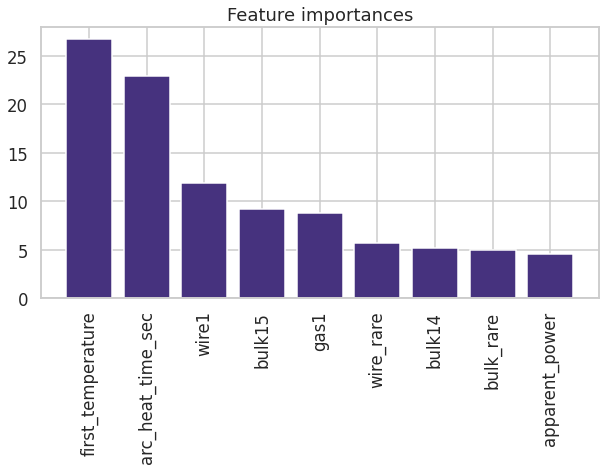

In [115]:
# Получение важности признаков
importances = best_model_cb.feature_importances_

# Создание списка названий признаков
feature_names = list(X_train_multi.columns)

# Создание объекта Series с важностью признаков и их названиями
feature_importances = pd.Series(importances, index=feature_names)

# Сортировка признаков по убыванию важности
feature_importances = feature_importances.sort_values(ascending=False)

# Построение графика важности признаков
plt.figure(figsize=(10,5))
plt.title("Feature importances")
plt.bar(range(len(feature_importances)), feature_importances.values)
plt.xticks(range(len(feature_importances)), feature_importances.index, rotation=90)
plt.show()

### Вывод.

При анализе важности признаков в модели предсказания температуры стали было выявлено, что наиболее значимым фактором является "first_temperature". Это означает, что исходная температура стали имеет наибольшее влияние на предсказание целевой переменной.<br>

Другие признаки, которые имеют меньшую, но все еще значительную важность, также могут оказывать влияние на предсказание температуры стали. Порядок важности признаков может быть использован для определения наиболее значимых факторов и дальнейшего анализа их влияния на целевую переменную.<br>

График важности признаков наглядно демонстрирует относительную значимость каждого признака. По горизонтальной оси представлены названия признаков, а по вертикальной оси - значимость каждого признака. Визуальное представление графика помогает визуально сравнить значимость различных признаков и легко идентифицировать наиболее важные с точки зрения модели.

## Отчет о проделанной работе.

1. В ходе ваполнения проекта были выполнены все пункты изначального плана: <br>

- первичный анализ данных
- изучение общей информации
- графический анализ
- составлен список вопросов для бизнеса о технологическом процессе, провередена консультация с заказчиком
- выполнена предобработка даных
- исходные данные были объединены в единый датасет
- данные были разделены на обучающую и тестовую выборку
- произведен исследовательский анализ данных
- данные проверены на мультиколлинеарность
- обучено 4 разные модели
- выбрана лучшая модель
- выбранная модель протестирована
- метрика MAE на тестовой выборке меньше 6.8, согласно установленной границы
- произведена оценка важности факторов для модели


2. Возникшие трудности и пути преодоления: <br>

- метрика MAE лучшей модели изначально показывала 6 на обучении и 9 на тестировании, что больше установленного порога 6.8
- была неочевидна проблема наличия всех данных по всем партиям, при очистке данных получалось, что партии, по которым было недостаточно данных по всем итерациям и процессам, попадали в итоговый датасет. <br>
- после очистки данных от партий с неполной информации модель достигла необходимого значения MAE. <br>

3. Ключевые шаги в решении задачи: <br>

- предобработка данных
- анализ данных и создание новых признаков на основе исходных
- построение различных моделей, перебор гиперпараметров для моделей

4. Итоговая модель:<br>

- лучший результат показала модель градиентного бустинга CatBoost
- MAE на тестовой выборке равно 6.709361346631961. В среднем модель делает ошибку в предсказании температуры стали на тестовой выборке, которая составляет приблизительно 6.71 единицы. То есть, средняя абсолютная разница между предсказанными значениями и фактическими значениями температуры стали составляет около 6.71.

5. Список признаков, используемых для обучения модели и описание их предобработки: <br>

- arc_heat_time_sec
- apparent_power
- bulk14
- bulk15
- bulk_rare
- wire1
- wire_rare
- gas1
- first_temperature <br>

Признак arc_heat_time_sec был создан в ходе выполнения проекта из таблицы electrode_df путем перевода данных из столбцов Начало нагрева дугой и Конец нагрева дугой в формат datetime и нахождения разности этого времени. <br>

Признак apparent_power создан из таблицы electrode_df путем нахождения квадрата из суммы квадратов Активной и Реактивной мощности. Использована формула полной мощности. Это было сделано исходя из логики, что изначальные признаки были бы сильно коррелирующими и пришлось бы удалять один из них, т.к. это мешало бы обучению модели. Используя формулу полно мощности мы избавляемся от корреляции, при этом не теряем один из признаков. <br>

Из данных о подаче сыпучих материалов оставили в изначальном виде только bulk 12, bulk 14 и  bulk 15 (из 15) по остальным bulk было слишком мало информации и они были проссумированы в признак bulk rare. При этом bulk12 был также удален на этапе проверки на мультиколлиинеарность, чтобы модель показывала лучший результат метрики MAE. Аналогично с данными о подаче проволочных материалов wire - редкие wire были проссумированы в столбец wire_rare. Оставшиеся пустые значения были заполнены нулями. <br>

Признак gas1 получили из таблицы gas_df, время подачи газа из данной таблицы не использовали из-за неинформативности данного признака. <br>

Признак first_temperature вывели из таблицы temperature_df столбца Температура, взяв первое значение по времени измерения. <br>

6. Гиперпараметры лучшей модели: <br>

Гиперпараметры лучшей модели определялись с помощью RandomizedSearchCV:
- learning_rate: Скорость обучения модели. Возможные значения: [0.01, 0.1, 1].
- depth: Глубина дерева. Возможные значения: [3, 5, 7].
- l2_leaf_reg: Коэффициент L2-регуляризации. Возможные значения: [1, 3, 5, 7].
- iterations: Количество итераций обучения. Возможные значения: [100, 600].

В процессе выполнения RandomizedSearchCV лучшими параметрами были выбраны: 'learning_rate': 0.01, 'l2_leaf_reg': 3, 'iterations': 600, 'depth': 5. <br>

7. Рекомендации для улучшения модели: <br>

- Увеличение количества итераций: увеличить количество итераций в параметрах модели iterations. 

- Подбор других гиперпараметров: изменить значения параметров learning_rate, depth и l2_leaf_reg для поиска оптимальной комбинации. Экспериментировать с различными значениями, чтобы найти лучшую комбинацию, которая дает наилучший результат.

- Увеличение размера обучающей выборки: увеличить размер обучающей выборки. Больший объем данных может помочь модели лучше обобщать и находить закономерности.

- Инженерия признаков: создание новых признаков, которые могут содержать дополнительную информацию или улучшить представление данных для модели. Рассмотреть различные преобразования данных, масштабирование признаков или добавление новых признаков.

- Ансамбли моделей: рассмотреть возможность создания ансамбля моделей, комбинируя прогнозы нескольких моделей. Это может помочь улучшить предсказательную способность и уменьшить вариативность результатов.

Снижение расходов на электропотребление - это комплексная задача бизнеса и предсказание температуры сплава лишь один из этапов в достижении цели. Основываясь на проделанной работе можно выделить следующие рекомендации для бизнеса: <br>

- Анализировать данные для идентификации факторов, влияющих на энергопотребление и колебания температуры.
- Определить нормальные границы для колебаний температуры.
- Изучить аномалии и выявить возможные причины колебаний температуры, учитывая химический состав материалов, газы, используемые электроды и другие параметры производства.
- Разработать мероприятия по оптимизации процессов с целью снижения энергопотребления, включая внедрение новых технологий, оптимизацию процедур работы, внесение изменений в материалы или газы, обучение персонала и другие действия.
- Мониторить и измерять параметры производства, такие как температура и энергопотребление, для оценки эффективности мероприятий и своевременной реакции на отклонения.
- Постоянно улучшать процессы с целью дальнейшего снижения энергопотребления, анализируя данные, изучая факторы и оптимизируя процессы.